In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [63]:
DAT_FILE = r"C:\Users\shrey\Documents\Projects\pokerai\build\preflop_dist_10000.dat"
CLUSTER_FILE = r"C:\Users\shrey\Documents\Projects\pokerai\build\clusters.txt"

TAG_BITS = 64
HIST_SIZE = 50
HIST_BITS = 16

def read_data(filename):
    rv = {}
    with open(filename, "rb") as f:
        while True:
            tag_bytes = f.read(TAG_BITS // 8)
            if not tag_bytes:
                break
            tag = int.from_bytes(tag_bytes, byteorder="little", signed=True)

            vals = []

            for hist_index in range(HIST_SIZE):
                hist_bytes = f.read(HIST_BITS // 8)
                hist_val = int.from_bytes(hist_bytes, byteorder="little", signed=False)
                vals.append(hist_val)

            rv[tag] = vals

    return rv

def read_cluster_mapping(filename):
    rv = {}
    with open(filename, "r") as f:
        for i, line in enumerate(f):
            if line.strip() == "":
                continue
            rv[i] = int(line.strip())
    return rv


def dict_to_matrix(d):
    keys = list(range(len(d)))
    matrix = np.zeros((len(d), HIST_SIZE))

    for key in keys:
        matrix[key, :] = d[key]

    return matrix

dists_dict = read_data(DAT_FILE)
cluster_assignment = read_cluster_mapping(CLUSTER_FILE)

In [64]:
dists = dict_to_matrix(dists_dict)
dists.shape

(169, 50)

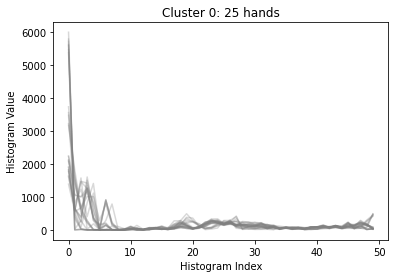

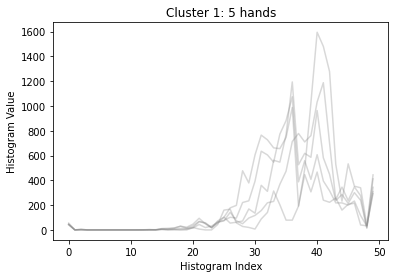

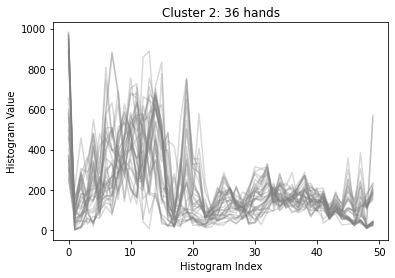

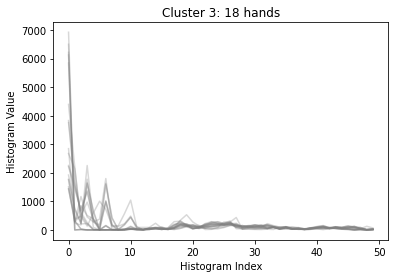

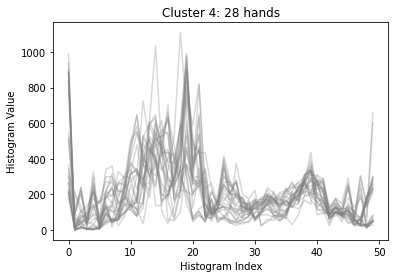

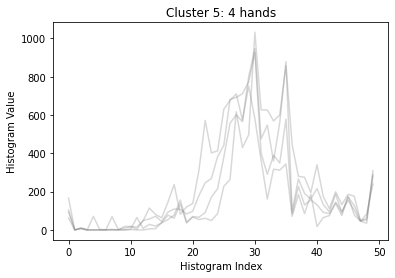

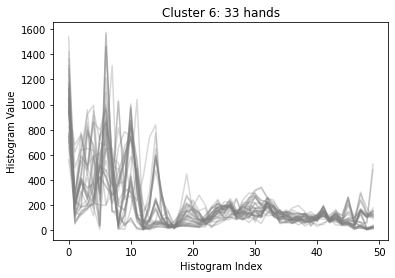

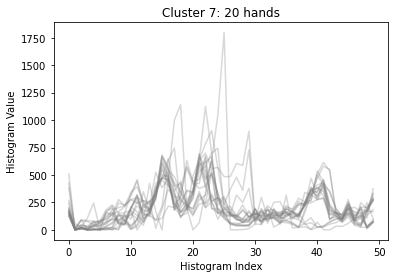

In [67]:
cluster_dists = defaultdict(list)
for hand_index in range(len(dists)):
    cluster_index = cluster_assignment[hand_index]
    cluster_dists[cluster_index].append(dists[hand_index])

for cluster_index in range(len(cluster_dists)):
    num_hands = len(cluster_dists[cluster_index])
    for d in cluster_dists[cluster_index]:
        plt.plot(d, alpha=0.3, color="gray")
    plt.title("Cluster {}: {} hands".format(cluster_index, num_hands))
    plt.xlabel("Histogram Index")
    plt.ylabel("Histogram Value")
    plt.show()